In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [9]:
train = pd.read_csv('../data/train.csv')
y=train.Survived.values
test = pd.read_csv('../data/test.csv')
pas_id=test.PassengerId.values
train_test_data = pd.concat([train, test],axis=0)

In [10]:
train_test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
title=[]
for i in train_test_data['Name']:
    t=i.split(",")[1].split(".")[0].strip()
    title.append(t)
train_test_data["Title"]=title

In [13]:
train_test_data.Title.value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [14]:
train_test_data['FamilySize'] = train_test_data['Parch'] + train_test_data['SibSp'] + 1

In [15]:
train_test_data.FamilySize.value_counts()

FamilySize
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64

In [16]:
train_test_data['Singleton'] = train_test_data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train_test_data['SmallFamily'] = train_test_data['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
train_test_data['LargeFamily'] = train_test_data['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

In [17]:
CleanTicket=[]
for i in train_test_data.Ticket:
    i = i.replace('.', '')
    i = i.replace('/', '')
    i = i.split()[0]
    if i.isalpha():
        CleanTicket.append(i)
    else:
        CleanTicket.append("Number")

In [18]:
train_test_data["CleanTicket"]=CleanTicket

In [20]:
train_test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Singleton,SmallFamily,LargeFamily,CleanTicket
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,1,0,Number
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,1,0,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,0,0,Number
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,1,0,Number
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,0,0,Number
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,1,0,0,Number
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona,1,1,0,0,PC
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,1,0,0,SOTONOQ
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,1,1,0,0,Number


In [21]:
train_test_data.drop(["Survived"],axis=1,inplace=True)

In [22]:
train_test_data.drop(["Name","FamilySize","Ticket"],axis=1,inplace=True)

In [23]:
def cable_name(x):
    try:
        return x[0]
    except TypeError:
        return "None"
train_test_data["Cabin"]=train_test_data.Cabin.apply(cable_name)

In [24]:
train_test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Singleton,SmallFamily,LargeFamily
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.603514,0.333843,0.062643
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.489354,0.471765,0.242413
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000,1.000000,0.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [25]:
train_test_data['Age'].fillna(np.mean(train_test_data.Age),inplace=True)
train_test_data['Fare'].fillna(np.mean(train_test_data.Fare),inplace=True)
train_test_data['Fare'] = StandardScaler().fit_transform(train_test_data['Fare'].values.reshape(-1, 1))
train_test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Singleton,SmallFamily,LargeFamily
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1.309000e+03,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,2.442660e-17,0.603514,0.333843,0.062643
std,378.020061,0.837836,12.883193,1.041658,0.865560,1.000382e+00,0.489354,0.471765,0.242413
min,1.000000,1.000000,0.170000,0.000000,0.000000,-6.437751e-01,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,-4.911082e-01,0.000000,0.000000,0.000000
50%,655.000000,3.000000,29.881138,0.000000,0.000000,-3.643001e-01,1.000000,0.000000,0.000000
75%,982.000000,3.000000,35.000000,1.000000,0.000000,-3.906640e-02,1.000000,1.000000,0.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,9.262219e+00,1.000000,1.000000,1.000000


In [26]:
num_data=train_test_data.select_dtypes(exclude=object).columns

In [27]:
train_test_data[num_data].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Singleton,SmallFamily,LargeFamily
0,1,3,22.0,1,0,-0.503595,0,1,0
1,2,1,38.0,1,0,0.734503,0,1,0
2,3,3,26.0,0,0,-0.490544,1,0,0
3,4,1,35.0,1,0,0.382925,0,1,0
4,5,3,35.0,0,0,-0.488127,1,0,0


In [28]:
cat_data=train_test_data.select_dtypes(include=object).columns

In [29]:
print(train_test_data[cat_data].info())
train_test_data['Embarked'].fillna(train_test_data['Embarked'].mode()[0], inplace = True)

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sex          1309 non-null   object
 1   Cabin        1309 non-null   object
 2   Embarked     1307 non-null   object
 3   Title        1309 non-null   object
 4   CleanTicket  1309 non-null   object
dtypes: object(5)
memory usage: 61.4+ KB
None


In [30]:
for i in cat_data:
    train_test_data[i].fillna("Missing",inplace=True)
    dummies=pd.get_dummies(train_test_data[i],prefix=i)
    train_test_data=pd.concat([train_test_data,dummies],axis=1)
    train_test_data.drop(i,axis=1,inplace=True)


In [31]:
train_test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Singleton,SmallFamily,LargeFamily,Sex_female,...,CleanTicket_SOC,CleanTicket_SOP,CleanTicket_SOPP,CleanTicket_SOTONOQ,CleanTicket_SP,CleanTicket_STONO,CleanTicket_STONOQ,CleanTicket_SWPP,CleanTicket_WC,CleanTicket_WEP
0,1,3,22.0,1,0,-0.503595,0,1,0,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,38.0,1,0,0.734503,0,1,0,True,...,False,False,False,False,False,False,False,False,False,False
2,3,3,26.0,0,0,-0.490544,1,0,0,True,...,False,False,False,False,False,False,False,False,False,False
3,4,1,35.0,1,0,0.382925,0,1,0,True,...,False,False,False,False,False,False,False,False,False,False
4,5,3,35.0,0,0,-0.488127,1,0,0,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
test_data=train_test_data.iloc[891:]
train_data=train_test_data.iloc[:891]
y=y
train=train_data
targets=y

In [33]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [35]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<Axes: ylabel='feature'>

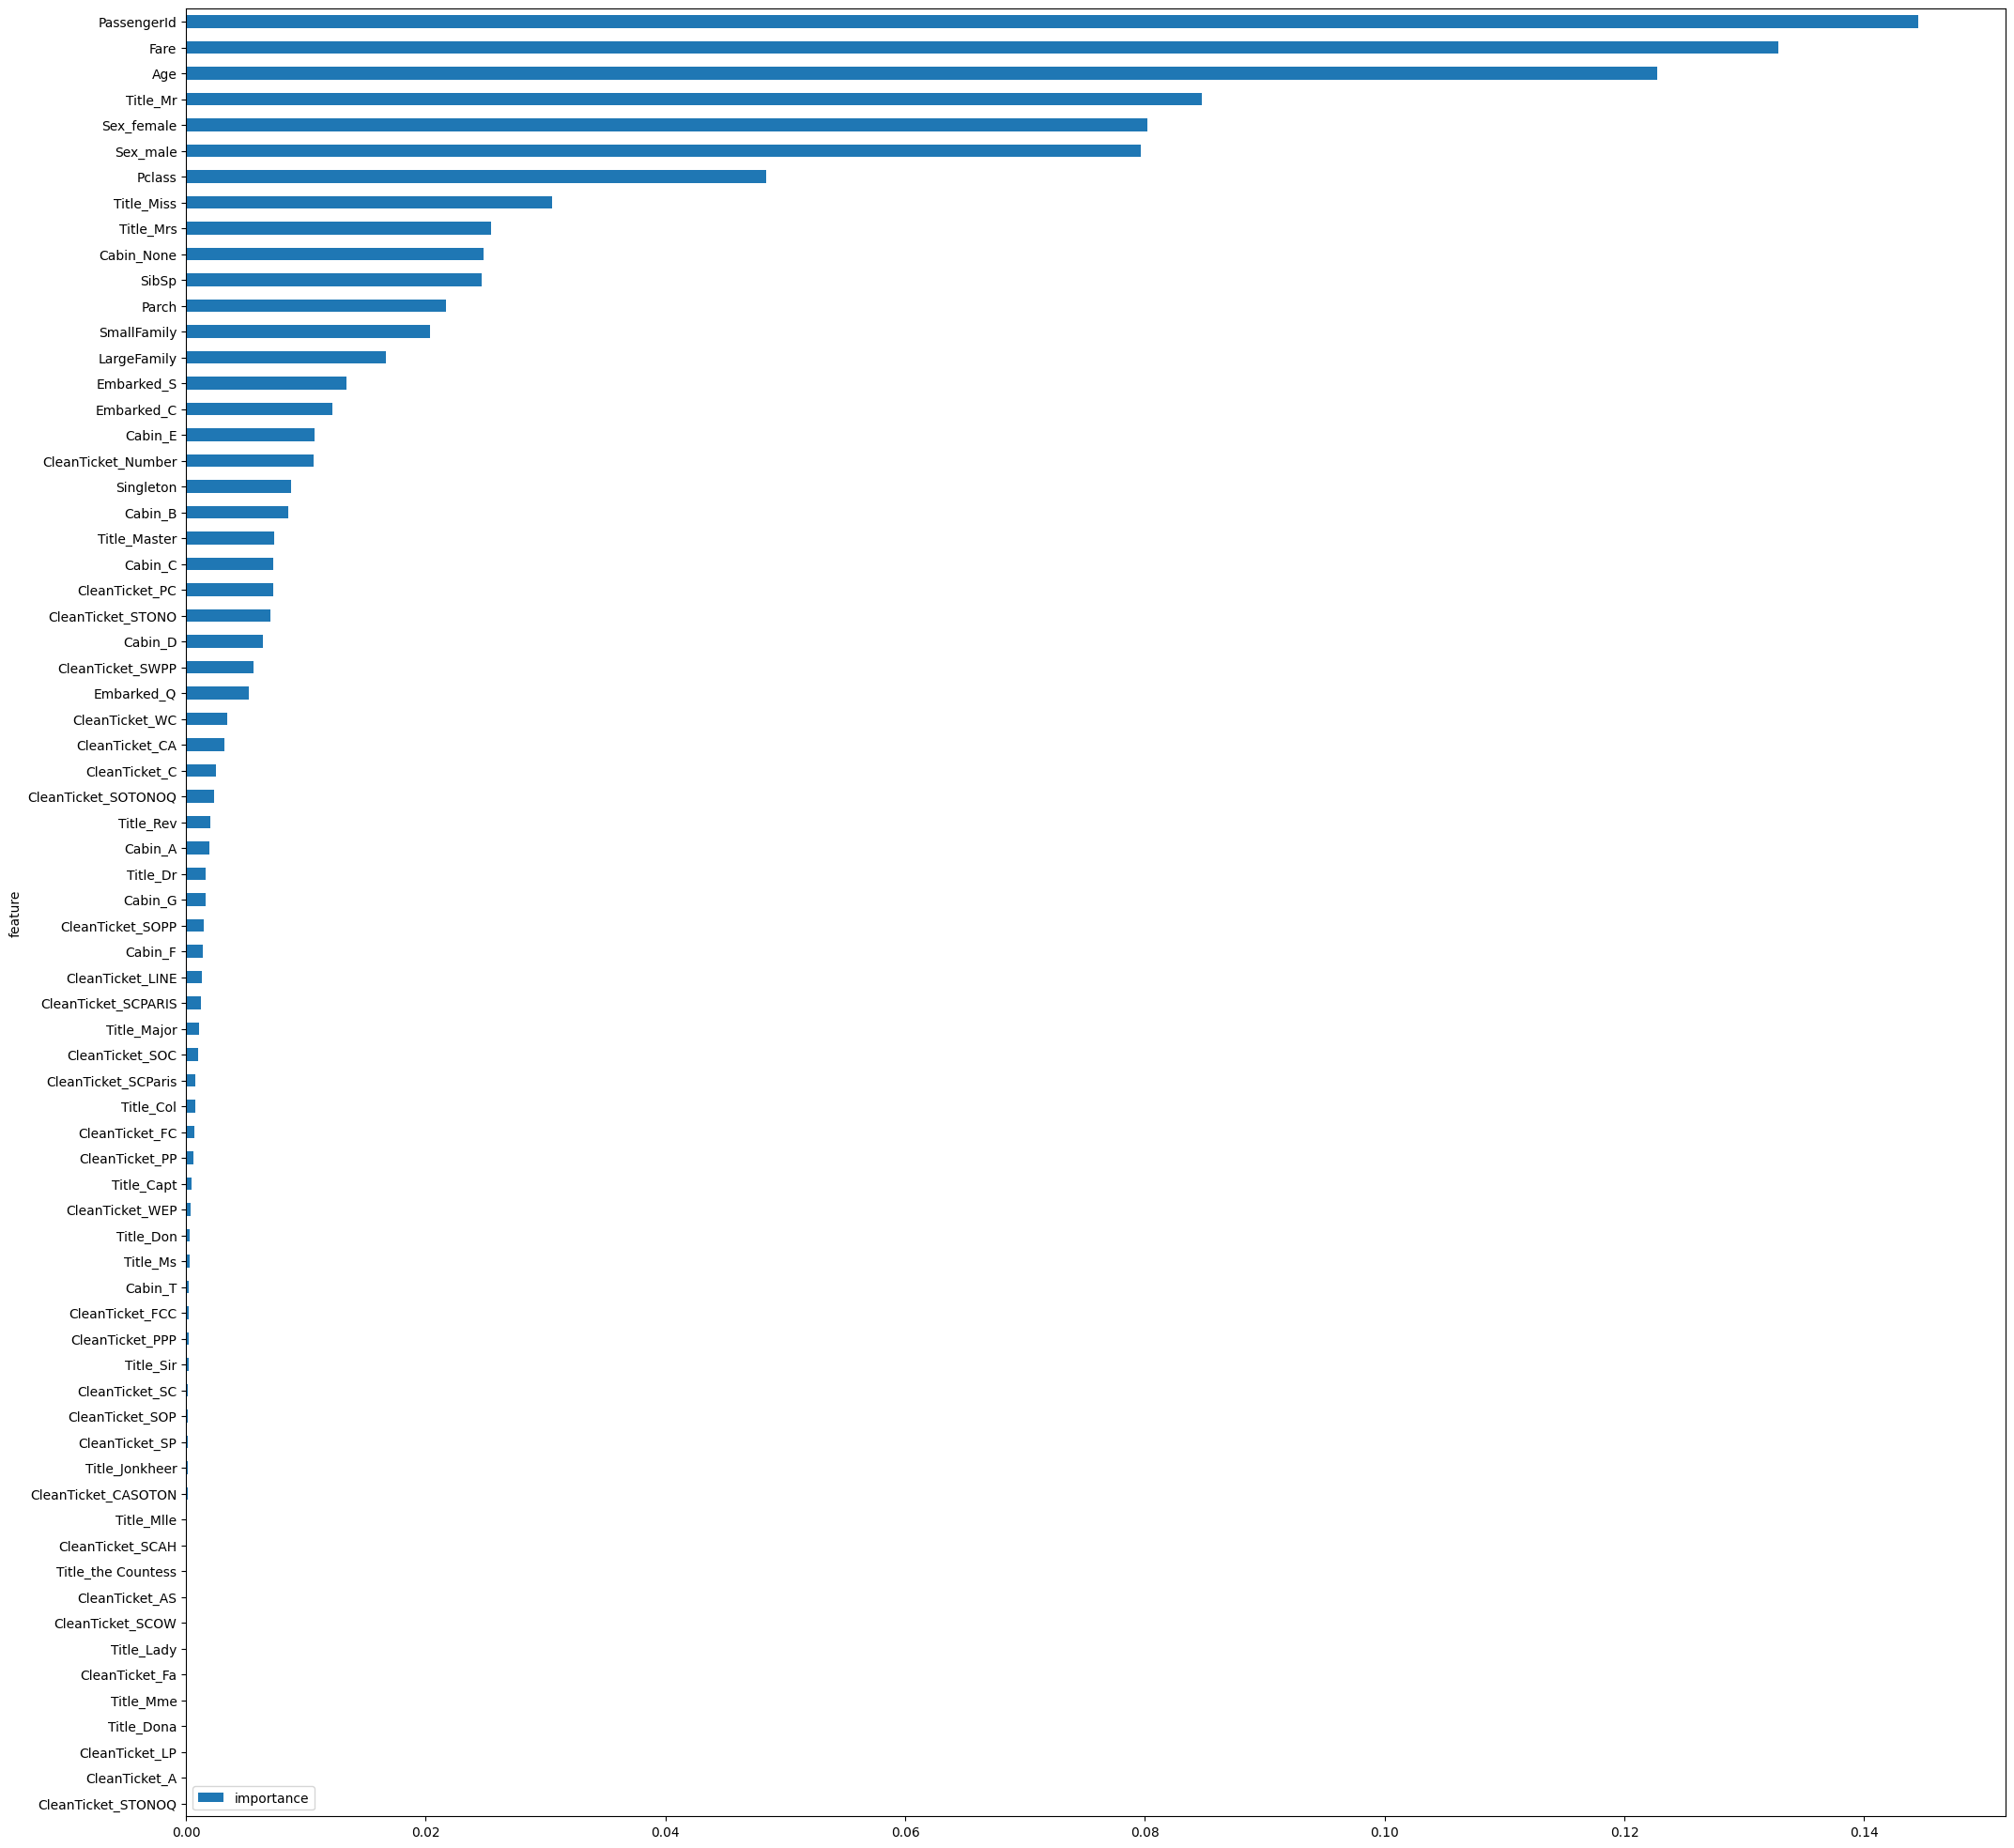

In [36]:
features.plot(kind='barh', figsize=(25, 25))

In [37]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train_data)
print(train_reduced.shape)
test_reduced = model.transform(test_data)
print(test_reduced.shape)

(891, 14)
(418, 14)


/Users/jeonchan/miniforge3/envs/ml_dev/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/jeonchan/miniforge3/envs/ml_dev/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [43]:
clf=RandomForestClassifier(min_samples_split=2,max_depth=6,bootstrap=True,min_samples_leaf=1,n_estimators=100,max_features='auto')
clf.fit(train_reduced,y)
pred=clf.predict(test_reduced)
pred

/Users/jeonchan/miniforge3/envs/ml_dev/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.model_selection import cross_val_score,train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_data,y,test_size=0.2)
clf=RandomForestClassifier(min_samples_split=2,max_depth=6,bootstrap=True,min_samples_leaf=1,n_estimators=100,max_features='auto')
clf.fit(X_train,y_train)
pred=clf.predict(X_test).reshape(-1,1)
cv_result = cross_val_score(clf,pred,y_test,cv=6) 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/6)

In [44]:
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50,10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train_data, y)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train_data, y)

In [45]:
submission = pd.DataFrame(
    {
        "PassengerId":test["PassengerId"], # 앞에서 PassendgerId 삭제했으므로 다시 불러 옴
        "Survived": pred
    }
)
submission.to_csv('80.csv', index=False)

In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
